# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

#np.random.seed(99)
df = pd.read_csv('data/human_body_temperature.csv')

data_temp = df['temperature']

In [2]:
# Your work here.
print(df.head())
print(df.info())
print(df.describe())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


# Question 1: 

To cehck for normality of the sample distribution, we will plot the CDF of the sample distribution and compare it to a CDF of a normal distribution with
mean and varaince of the sample distribution

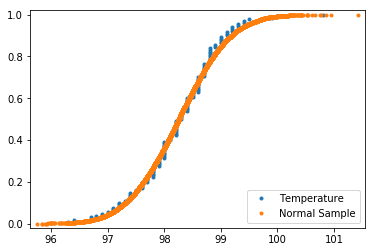

In [3]:
# Question 1: Testing for normality of the distribution of body temperatures by EDA

#Define ECDF (Empirical Cumulative Density Function)
def ecdf(data):
    
    n = len(data)
    
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    
    return x, y

#Compute mean and standard deviation of body temperature
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

#Take a random sample out of a normal distribution with mean mu and standard deviation sigma
sample_nor_rand = np.random.normal(mu, sigma, 10000)

#Compute ECDF of normal sample and data
x_data, y_data = ecdf(df['temperature'])
x_normal_sample, y_normal_sample = ecdf(sample_nor_rand)

_ = plt.plot(x_data, y_data, marker='.', linestyle='none')
_ = plt.plot(x_normal_sample, y_normal_sample, marker='.', linestyle='none')

plt.margins(0.02)

plt.legend(('Temperature', 'Normal Sample'), loc='lower right')

plt.show()

From the plot above, it is clear that the sample distribution is normal. Assuming that the sample distribution is
representative of the parent population, we can assume the parent population is normal.

# Question 2

Yes, the sample is larger, since sample size > 30. Yes, the observations are independent, which is a necessary 
condition for the Central Limit Theorem to hold.

# Question 3:

We will test if the mean population is 98.6, using both the bootstrap and frequentist approach.

In [4]:
# Question 3: Testing if the population mean is 98.6
# Bootstrap Hypothesis Test

# Define function to draw bootstrap replicates
def draw_bs_reps(data, func, size=1):

    #Initialize empyty array of length size
    bs_replicates = np.empty(size)
    
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, 10000))
        
    return bs_replicates
        
#Calculate the mean, if null is true    
data_null = data_temp - np.mean(df['temperature']) + 98.6 

# Take bootstrap samples from data_null
bs_replicates = draw_bs_reps(data_null, np.mean, 100)

# Compute the fraction of bs_replicates that are greater than or equal to the actual sample mean 
#when the null hypothesis is true
p = np.sum(bs_replicates <= np.mean(data_temp)) / 10000

print('p value: {:.4f}'.format(p))



p value: 0.0000


The p-value is very small, p < 0.01, so we reject the null hypothesis that the mean is 98.6 at 1% level of significance

Frequentist Testing:

We will use a one-sample test here, since we are testing if the mean body temperature = 98.6, and not for equality of
means of two populations.
We will use the z-test here because the sample size = 130 > 30. Since sample size is large, we can apply the Central Limit Theorem and use the z-test for testing the null hypothesis that the mean body temperature is 98.6.

In [5]:
#Compute the z test statistic under the null hypothesis Ho: mean mu = 98.6

std_mean = np.std(data_temp) / np.sqrt(len(data_temp))
z = (np.mean(data_temp) - 98.6) / std_mean


print('z = {:.4f}'.format(z))

z = -5.4759


z = -5.48 < -1.65 = Pr(SNV <= -2.33). SNV is the distribution of a standard normal variable (mean = 0, variance =1). 
Altrenatively, the p value is Pr(z < -5.48), which is very close to zero. If the null hypothesis is true, then the 
p-value is the probability of obtaining a sample that is at least as extreme as what is observed. Since p-value is less than 0.01%, we reject the null hypothesis at level 1% of significance.

In [6]:
# Compute the t test statistic under the null hypothesis that mean = 98.6

t = (np.mean(data_temp) - 98.6) / std_mean
print('t = {:.4f}'.format(t))


t = -5.4759


This test statistic has a t distribution with (n-1) degrees of freedom, where n = 130 is the sample size. For large n,
t distribution is the same as normal. In this case, because n is large the two tests are identical. 

# Question 4

For sample size < 30, note that tests are only valid if the population is normal. If the popolation standard deviation is known, the z-test can be used. If the population standard deviation is unknown, we will need to estimate it by sample standard deviation. In this case, t-test is the appropriate test to use. Note that, in both cases, becasue sample size is small, CLT cannot be applied and so, the distribution of the population has to be normal. If normality of the population distribution fails, both z-test and t-test are invalid.

In [7]:
#For sample size < 30, note that t-tests are only valid if the population is normal.
sample_size_10 =  np.random.choice(data_temp, 10)

#Compute z and t test statistics

std_mean_10 = np.std(sample_size_10) / np.sqrt(len(sample_size_10))
t = z = (np.mean(sample_size_10) - 98.6) / std_mean

print('t = {:.4f}'.format(t))

t = -6.4006


For  the t-test, we reject the null hypothesis if Pr(t < -2.82). We cannot compute the z-test statistic here, becasue the population standard deviation is unknown and the sample size = 10 < 30.

# Question 5

We need to compute confidence intervals for the population mean body temperature by both the bootsrap and frequentist
methods. We will be using 95% confidence intervals.

In [8]:
#Draw bootstrap replicates of the mean
bs_replicates = draw_bs_reps(data_temp, np.mean, 1000)

#Compute 95% Confidence Interval of the mean
conf_int_95 = np.percentile(bs_replicates, [2.5, 97.5])

print('95% Confidence Interval by Bootstrap: [{0:.4f}, {1:.4f}]'.format(conf_int_95[0], conf_int_95[1]))

#Frequentist Approach

std_mean = np.std(data_temp) / np.sqrt(len(data_temp))

CI_low = np.mean(data_temp) - (1.96 * std_mean)
CI_high = np.mean(data_temp) + 1.96 * std_mean

print('95% Confidence Interval by Frequentist: [{:.4f}, {:.4f}]' .format(CI_low, CI_high))


95% Confidence Interval by Bootstrap: [98.2358, 98.2643]
95% Confidence Interval by Frequentist: [98.1237, 98.3748]


# Question 6

To test if there is a difference in mean body temperature for males and females, we will use two-sample bootsrap test. 
If we had to test for the differnce in overall distributions, that is, test for both means and standard deviations,
we would need to do the two-sample permutation test.
We could also also use the frequentist hypothesis test. Sample size > 30, so applying CLT, we can use the z-test to test the null hypothesis that the mean body temperature of males and females are the same.

In [9]:
df_m = df[df['gender'] == 'M']
df_f = df[df['gender'] == 'F']

df_temp_m = df_m['temperature']
df_temp_f = df_f['temperature']

count_f = len(df_temp_f)
count_m = len(df_temp_m)

# Overall mean was computed in Question 2, mu 

print("Population mean: {:.4f}".format(mu))

#Compute mean body temperatures of males and females
mean_f = np.mean(df_temp_f)
mean_m = np.mean(df_temp_m)


# Generate adjusted arrays
df_adj_f = df_temp_f - mean_f + mu
df_adj_m = df_temp_m - mean_m + mu


# Compute 10,000 bootstrap replicates from adjusted arrays
bs_replicates_f = draw_bs_reps(df_adj_f, np.mean, 10000)
bs_replicates_m = draw_bs_reps(df_adj_m, np.mean, 10000)

# Compute p-value 
p = np.sum(bs_replicates_f - bs_replicates_m >= mean_f - mean_m) / len(bs_replicates_f)

print("p value: {:.4f}".format(p))
      

Population mean: 98.2492
p value: 0.0000


The p-value = 0.00 < 0.01, therefore we reject the null hypothesis that male and female body temperature are the same at 1% level of significance. We can also plot the ECDF of the male and female body temperature. The plot indicates that mean body temperature of females is higher than males.

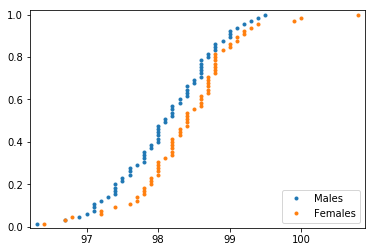

In [10]:
#Define ECDF (Empirical Cumulative Density Function)
def ecdf(data):
    
    n = len(data)
    
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    
    return x, y

#Compute ECDF of male and female data
x_data_m, y_data_m = ecdf(df_temp_m)
x_data_f, y_data_f = ecdf(df_temp_f)

_ = plt.plot(x_data_m, y_data_m, marker='.', linestyle='none')
_ = plt.plot(x_data_f, y_data_f, marker='.', linestyle='none')

plt.margins(0.02)

plt.legend(('Males', 'Females'), loc='lower right')

plt.show()

From the analysis above, it is clear that females have higher body temperatures than males. So instead of testing if the mean temperature is 98.6, we should statistically test the two means separately.